Welcome to NGS Analyzer

Loading...

***

Directory: C:\Users\M214784\Desktop\Santiago\Academia\2020\Mayo Clinic\Ekker Lab\Code
File: HEK GPF-BFP Scar Analyzed
Reference sequence: gtgaccaccctgTCTCATggcgtgcagtgc

All events: 57604
  Non-HDR events: 53919 (93.6%)
  HDR events: 3685 (6.4%)
    Precise: 3381 (5.87% with respect to all events, 91.75% with respect to HDR events only)
    Scarred: 304 (0.53% with respect to all events, 8.25% with respect to HDR events only)



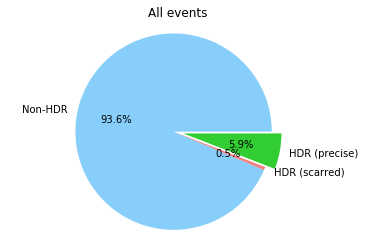

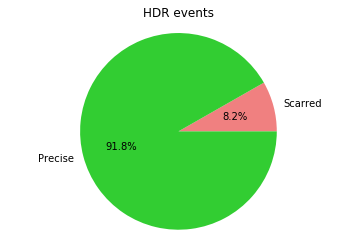

Run new analysis? yeS

Change directory? nO

Change file? yEs

Change reference sequence? YEs

***

Directory: C:\Users\M214784\Desktop\Santiago\Academia\2020\Mayo Clinic\Ekker Lab\Code
File: ZF GFP-BFP Try 1 Rep 1 NGS
Reference sequence: gtgaccaccctgTCTCATggcgtgcagtgc

All events: 33391
  Non-HDR events: 27279 (81.7%)
  HDR events: 6112 (18.3%)
    Precise: 3625 (10.86% with respect to all events, 59.31% with respect to HDR events only)
    Scarred: 2487 (7.45% with respect to all events, 40.69% with respect to HDR events only)



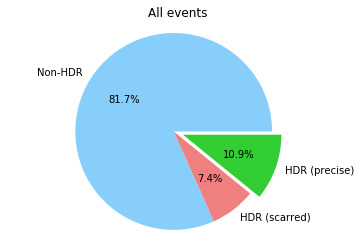

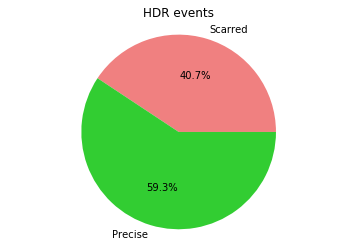

Run new analysis? nO.

Type in yes or no

Run new analysis? no

Press ENTER to exit


In [10]:
# WELCOME

print('Welcome to NGS Analyzer')
print('')
print('Loading...')
print('')

# LIBRARIES

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os
import re

# PARAMETERS

decision1, decision2, decision3, decision4 = 'yes','yes','yes','yes'

while decision1 == 'yes':
    
    print('***')
    print('')
    
    if decision2 == 'yes':
        # Path
        directory = 0
        while directory == 0:
            directory = input('Directory: ')
    else:
        print('Directory: ' + directory)
        
    if decision3 == 'yes':
        # File
        file = 0
        path = 0
        while file == 0:
            file = input('File: ')
            file = file + '.xlsx'
            path = os.path.join(directory, file)
            if Path(path).is_file() == False:
                file = 0
                print('File not found')
    else:
        print('File: ' + file)
            
    if decision4 == 'yes':
        # Reference sequence
        refSeq = 0
        while refSeq == 0:
            refSeq = input('Reference sequence: ')
            refSeq = str(refSeq).upper()
            if bool(re.match('^[AGCT]+$', refSeq)) == False:
                refSeq = 0
                print('The reference sequence can only contain A, G, C, or T')
    else:
        print('Reference sequence: ' + refSeq)
            
    # PROCESS
    
    # Import raw data
    xls = pd.ExcelFile(file)
    df = pd.read_excel(xls)
    df.index = np.arange(1, len(df) + 1)
    
    # Obtain true total events
    total = 0
    for i in range(1, df.shape[0] + 1):
        total = total + df.loc[:, 'Count'][i]
    
    # Obtain HDR indices
    indexList = []
    for i in range(1, df.shape[0]):
        if df.loc[:, 'HDR'][i] == 'O':
            indexList.append(df.index[i-1])
        
    # Extract HDR sequences and true total HDR events
    sequenceList = []
    totalHDR = 0
    for i in range(0, len(indexList)):
        for j in range(1, df.shape[0] + 1):
            if indexList[i] == j:
                sequenceList.append(df.loc[:, 'RGEN Treated Sequence'][j])
                totalHDR = totalHDR + df.loc[:, 'Count'][j]
                
    # Obtain true total precise HDR events
    totalHDRprecise = 0
    for i in range(0, len(indexList)):
        for j in range(1, df.shape[0] + 1):
            if indexList[i] == j:
                if refSeq in sequenceList[i]:
                    totalHDRprecise = totalHDRprecise + df.loc[:, 'Count'][j]
                    
    # RESULTS
    
    # Printed
    print('')
    print('All events: ' + str(total))
    print('  Non-HDR events: ' + str(total - totalHDR) + ' (' + str(round((total - totalHDR)/total*100, 2)) + '%)')
    print('  HDR events: ' + str(totalHDR) + ' (' + str(round(totalHDR/total*100, 2)) + '%)')
    print('    Precise: ' + str(totalHDRprecise) + ' (' + str(round(totalHDRprecise/total*100, 2)) + '% with respect to all events, ' + str(round(totalHDRprecise/totalHDR*100, 2)) + '% with respect to HDR events only)')
    print('    Scarred: ' + str(totalHDR - totalHDRprecise) + ' (' + str(round((totalHDR - totalHDRprecise)/total*100, 2)) + '% with respect to all events, ' + str(round((totalHDR - totalHDRprecise)/totalHDR*100, 2)) + '% with respect to HDR events only)')
    print('')
    
    # Pie charts
    labels1 = 'Non-HDR', 'HDR (scarred)', 'HDR (precise)'
    sizes1 = [total - totalHDR, totalHDR - totalHDRprecise, totalHDRprecise]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes1, explode = (0, 0, 0.1), labels = labels1, autopct = '%1.1f%%', startangle = 0, colors = ['lightskyblue','lightcoral','limegreen'])
    ax1.set_title('All events')
    ax1.axis('equal')
    labels2 = 'Scarred', 'Precise'
    sizes2 = [totalHDR - totalHDRprecise, totalHDRprecise]
    fig2, ax2 = plt.subplots()
    ax2.pie(sizes2, labels = labels2, autopct = '%1.1f%%', startangle = 0, colors = ['lightcoral','limegreen'])
    ax2.set_title('HDR events')
    ax2.axis('equal')
    plt.show()

    # Run new analysis?
    decision1, decision2, decision3, decision4 = 0, 0, 0, 0
    while decision1 == 0:
        decision1 = input('Run new analysis? ')
        if decision1 != '':
            decision1 = str(decision1).lower()
            print('')
        if decision1 not in {'yes','no'}:
            decision1 = 0
            print('Type in yes or no')
            print('')
    
    if decision1 == 'yes':
        # Change directory?
        decision2 = 0
        while decision2 == 0:
            decision2 = input('Change directory? ')
            if decision2 != '':
                decision2 = str(decision2).lower()
                print('')
            if decision2 not in {'yes','no'}:
                decision2 = 0
                print('Type in yes or no')
                print('')
        # Change file?
        decision3 = 0
        while decision3 == 0:
            decision3 = input('Change file? ')
            if decision3 != '':
                decision3 = str(decision3).lower()
                print('')
            if decision3 not in {'yes','no'}:
                decision3 = 0
                print('Type in yes or no')
                print('')
        # Change reference sequence?
        decision4 = 0
        while decision4 == 0:
            decision4 = input('Change reference sequence? ')
            if decision4 != '':
                decision4 = str(decision4).lower()
                print('')
            if decision4 not in {'yes','no'}:
                decision4 = 0
                print('Type in yes or no')
                print('')
    else:
        input('Press ENTER to exit')